In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Données
points = np.array([
    [1, 2],  # Point 1
    [1, 4],  # Point 2
    [2, 3],  # Point 3
    [5, 8],  # Point 4
    [6, 9],  # Point 5
    [5, 7]   # Point 6
])


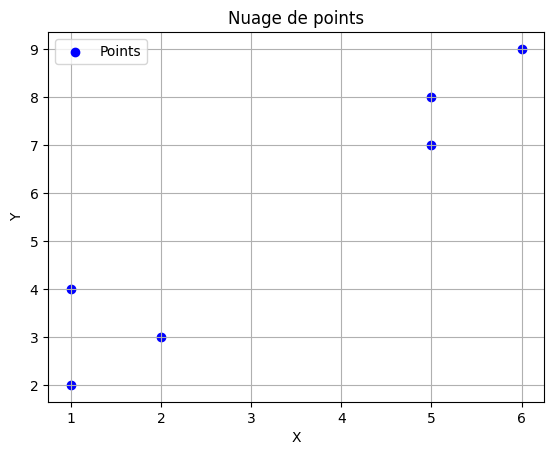

In [4]:
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')
plt.title('Nuage de points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Centroïdes initiaux
C1 = points[0]  # Point 1 (1, 2)
C2 = points[3]  # Point 4 (5, 8)
centroids = np.array([C1, C2])


In [6]:
# Fonction pour calculer la distance euclidienne
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Fonction pour assigner chaque point au cluster le plus proche
def assign_clusters(points, centroids):
    clusters = {0: [], 1: []}
    for point in points:
        distances = [distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(point)
    return clusters

# Fonction pour mettre à jour les centroïdes en calculant la moyenne des points de chaque cluster
def update_centroids(clusters):
    centroids = []
    for key in clusters.keys():
        new_centroid = np.mean(clusters[key], axis=0)
        centroids.append(new_centroid)
    return np.array(centroids)

# Algorithme K-Means
def kmeans(points, centroids, iterations=10):
    for i in range(iterations):
        clusters = assign_clusters(points, centroids)
        new_centroids = update_centroids(clusters)
        
        # Si les centroïdes ne changent plus, arrêter l'algorithme
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    return clusters, centroids

# Application de K-Means
clusters, final_centroids = kmeans(points, centroids)


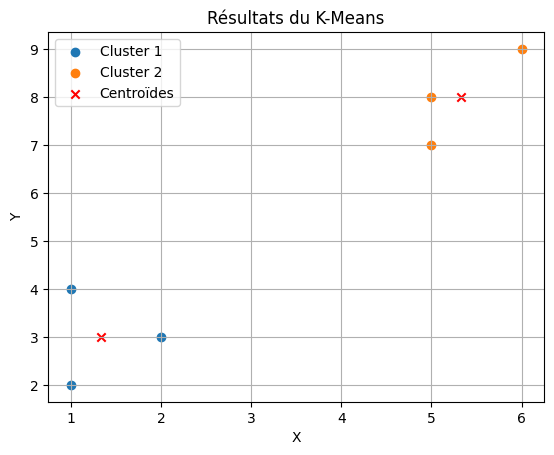

In [7]:
# Affichage des résultats
for cluster_id, cluster_points in clusters.items():
    cluster_points = np.array(cluster_points)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}')

# Tracer les centroïdes finaux
final_centroids = np.array(final_centroids)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', marker='x', label='Centroïdes')

plt.title('Résultats du K-Means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
print("Clusters finaux :")
for cluster_id, cluster_points in clusters.items():
    print(f"Cluster {cluster_id + 1}:")
    print(np.array(cluster_points))
    print()

print("Centroïdes finaux :")
print(final_centroids)


Clusters finaux :
Cluster 1:
[[1 2]
 [1 4]
 [2 3]]

Cluster 2:
[[5 8]
 [6 9]
 [5 7]]

Centroïdes finaux :
[[1.33333333 3.        ]
 [5.33333333 8.        ]]
